<a href="https://colab.research.google.com/github/cadred000/MAT421/blob/main/Module_A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Dan Gibson - Module A Homework

In [ ]:
import numpy as np
import sys
import matplotlib.pyplot as plt

## Binary Examples

Python has built-in functions that can convert integers to binary and format them.

In [ ]:
f'{333:b}'

'101001101'

In [ ]:
# Arithmetic with binary conversion
x = bin(4)
y = bin(7)
print(f"4 + 7 = {int(x, 2) + int(y, 2)} = {bin(int(x,2) + int(y,2))[2:]}")
print(f"4(7) = {int(x,2)*int(y,2)} = {bin(int(x,2)*int(y,2))[2:]}")

4 + 7 = 11 = 1011
4(7) = 28 = 11100


## Floating Point Numbers

We can use the "float_info" function to show us some information about how Python deals with floating point numbers.

In [ ]:
sys.float_info

sys.float_info(max=1.7976931348623157e+308, max_exp=1024, max_10_exp=308, min=2.2250738585072014e-308, min_exp=-1021, min_10_exp=-307, dig=15, mant_dig=53, epsilon=2.220446049250313e-16, radix=2, rounds=1)

The spacing function in numpy will allow us to find the gap between one number to the next.

In [ ]:
# find the largest number < 7 and the smallest number > 7
x = 7
print(f"In Python, the largest number less than 7 is {x - np.spacing(x)}")
print(f"The smallest number greater than 7 is {x + np.spacing(x)}")

In Python, the largest number less than 7 is 6.999999999999999
The smallest number greater than 7 is 7.000000000000001


Overflow and underflow are represented by inf and 0.


In [ ]:
# Overflow example using the largest number possible and doubling it
sys.float_info.max * 2

inf

In [ ]:
# Underflow example using an exponent smaller than the smallest allowed
3 ** (-1026)

0.0

## Round-off Errors

This error occurs when operations are performed on numbers that have been approximated.

In [ ]:
10.0 - 9.85

0.15000000000000036

The answer should be exactly 0.15, but it is not. This error will accumulate as additional operations are performed.  We can show this using a plot of showing the size of the accumulated error against number of operations.

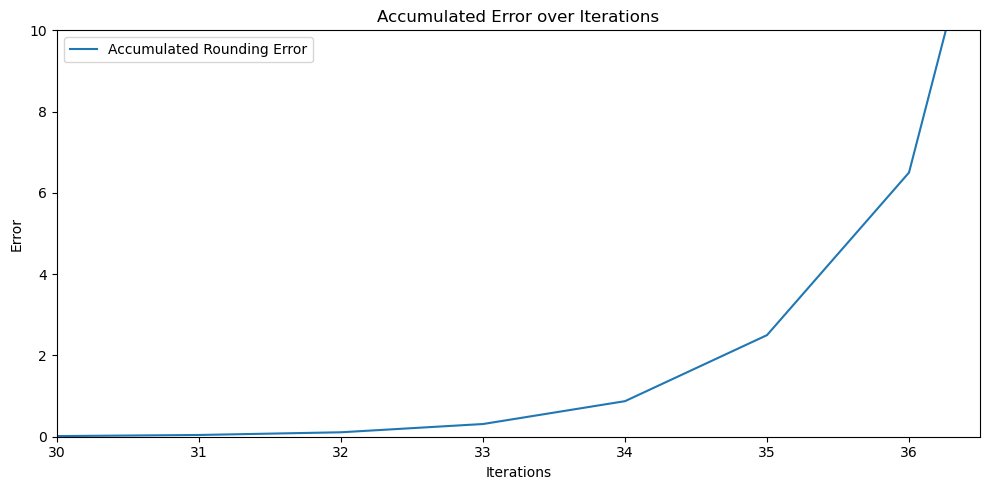

In [ ]:
iterations = 50
base = np.e
actual = []
accumulated = []
errors = []
counter = 1
for i in range(1,iterations):
    act = np.exp(i)
    counter *= base
    actual.append(act)
    accumulated.append(counter)
    errors.append(abs(act - counter))
plt.figure(figsize=(10,5))
plt.plot(range(1,iterations), errors, label='Accumulated Rounding Error')
plt.xlabel('Iterations')
plt.xlim(30,36.5)
plt.ylabel('Error')
plt.ylim(0,10)
plt.title('Accumulated Error over Iterations')
plt.legend()
plt.tight_layout()
plt.show()

Here we see the difference between the actual value of $e^x$ and the rounded value, taken over multiple iterations.  While Python remains accurate until approximately 30 iterations, the accumulated error quickly increases dramatically for subsequent calculations. After this point, it would be wise to consider the reliability of the results if accuracy is critical.